# State

Permite cria uma instancia de controle para a mudança de estado (atributo) de um classe de forma controlada

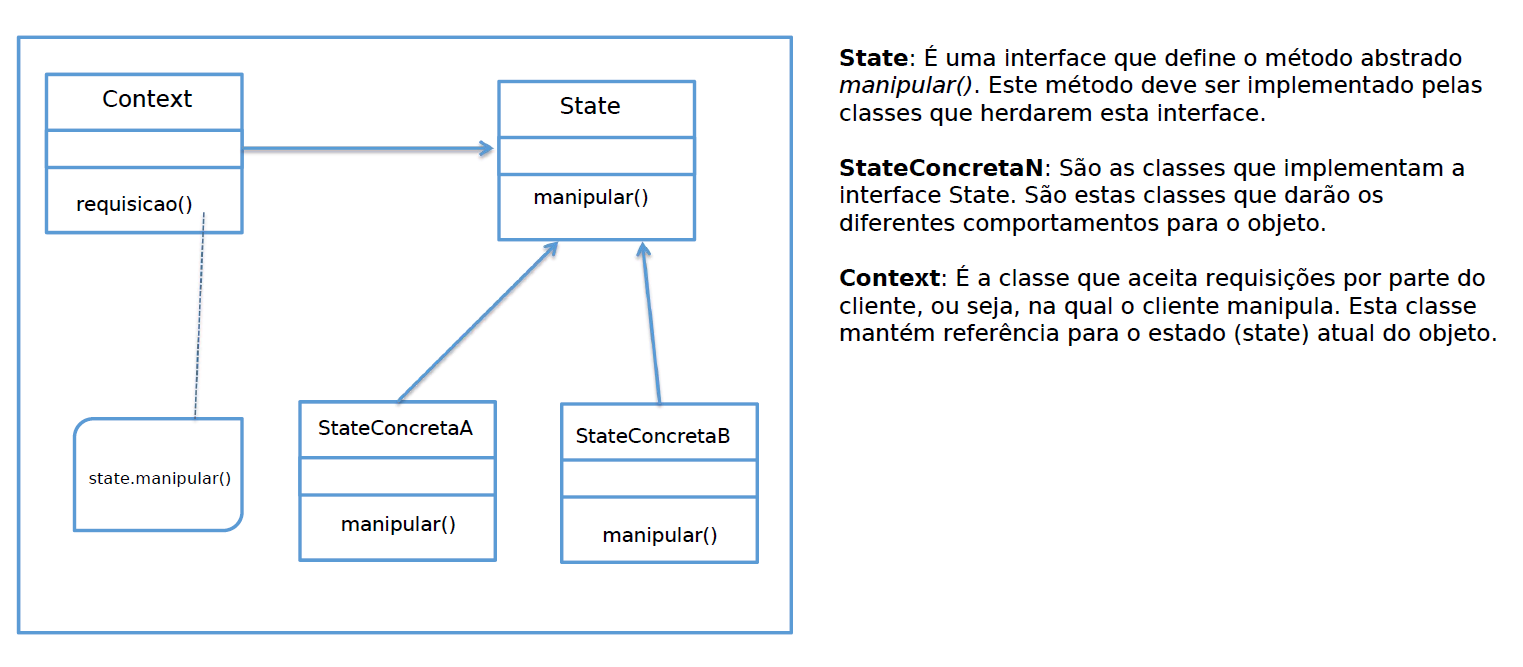

In [2]:
from abc import ABCMeta, abstractmethod

In [21]:
class ModePower(metaclass= ABCMeta):
    
    on = None
    modes = []
    
    
    def change(self, state):
        if state.on in self.modes:
            print(f"change state to: {self.on} -> {state.on}")
            self.__class__ = state
        else:
            print("State not reconized")

In [22]:
class PowerOn(ModePower):
    on = "on"
    modes = ["off", "sleep", "hibernate"]
        
class PowerOff(ModePower):
    on = "off"
    modes = ["on"]

class Sleep(ModePower):
    on = "sleep"
    modes = ["off", "on", "hibernate"]

class Hibernate(ModePower):
    on = "hibernate"
    modes = ["off", "on"]
    
    

In [23]:
class Computer():
    
    def __init__(self, name):
        self.name = name
        self.state = PowerOff()
    
    def change_state(self, state):
        self.state.change(state)

In [24]:
comp1 = Computer("Nitron")
power = PowerOn()
sleep = Sleep()
hibernate = Hibernate()


In [25]:
comp1.change_state(PowerOn)

change state to: off -> on


In [26]:
comp1.change_state(Sleep)

change state to: on -> sleep


In [27]:
comp1.change_state(PowerOn)

change state to: sleep -> on


In [28]:
comp1.change_state(PowerOff)

change state to: on -> off


## vantagens

* No padrão State, o comportamento de um objeto é resultado da função de seu estado, e o
comportamento muda em tempo de execução de acordo com este estado. Isso elimina a
dependência lógica condicional de if/else ou de switch/case (para linguagens que possui).

* Com o padrão State, as vantagens de implementar um comportamento polifórmico são
evidentes, além de ser mais fácil adicionar estados para dar suporte a novos
comportamentos.

* O padrão de projeto State também melhora a coesão, pois comportamentos específicos de
estados são agregados nas classes StateConcreta, que são colocados em um só lugar no
código.

* Com o padrão State é muito fácil acrescentar um comportamento simplesmente adicionando
mais uma classe StateConcreta. Desta forma aumenta a flexibilidade, permitindo estender o
comportamento da aplicação e facilitando a manutenção do código em geral.

## desvantagens

* Grande aumento do número de classes. Como todo estado deve ser definido com a ajuda de
StateConcreta, há uma chance de acabarmos escrevendo muito mais classes com uma
pequena funcionalidade.

* Com a introdução de cada novo comportamento, a classe Context deve ser atualizada para
lidar com o novo comportamento. Isso deixa o comportamento de Context mais frágil a cada
novo comportamento adicionado.